   Unnamed: 0                                             Título  Nota  \
0           0  Pijama Cirurgico  Scrub Roupa Privativa Hospit...   4.0   
1           1  Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...   4.5   
2           2  Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...   4.7   
3           3  Kit 10 Cuecas Boxer Mash Algodão Cotton Box Or...   4.6   
4           4  Kit 3 Short Jeans Feminino Cintura Alta Barato...   4.4   

   N_Avaliações  Desconto                            Marca   Material  \
0         273.0       NaN  toronto uniformes profissionais  poliéster   
1        3034.0      18.0                             lupo    algodão   
2        5682.0      20.0                            zorba    algodão   
3        1700.0      22.0                             mash    algodão   
4         507.0       9.0                     menina linda       jean   

       Gênero        Temporada  \
0  Sem gênero     não definido   
1   Masculino   outono/inverno   
2   Masculino 

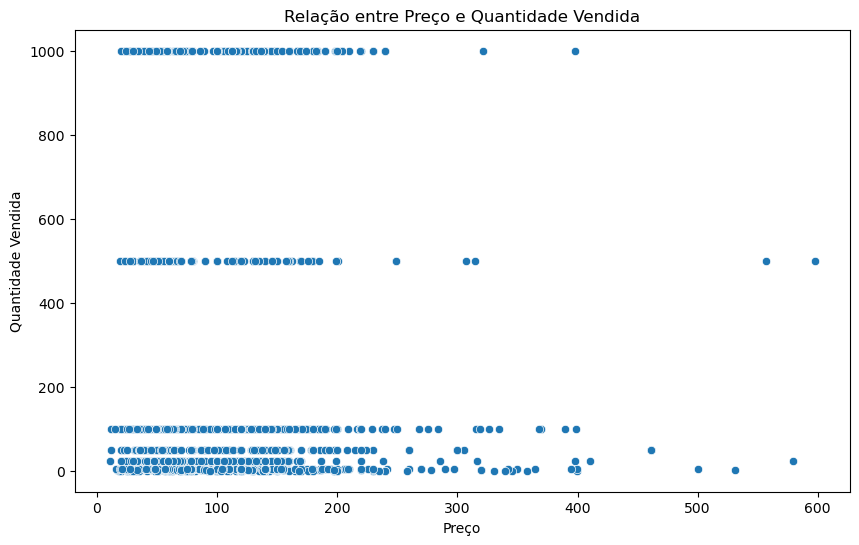

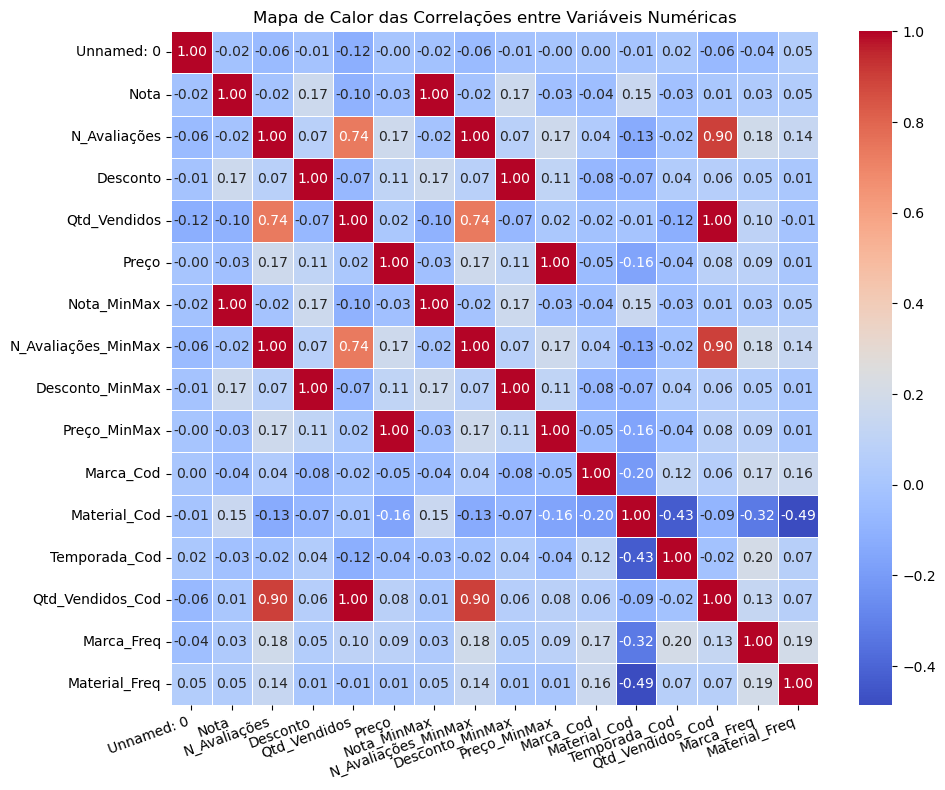

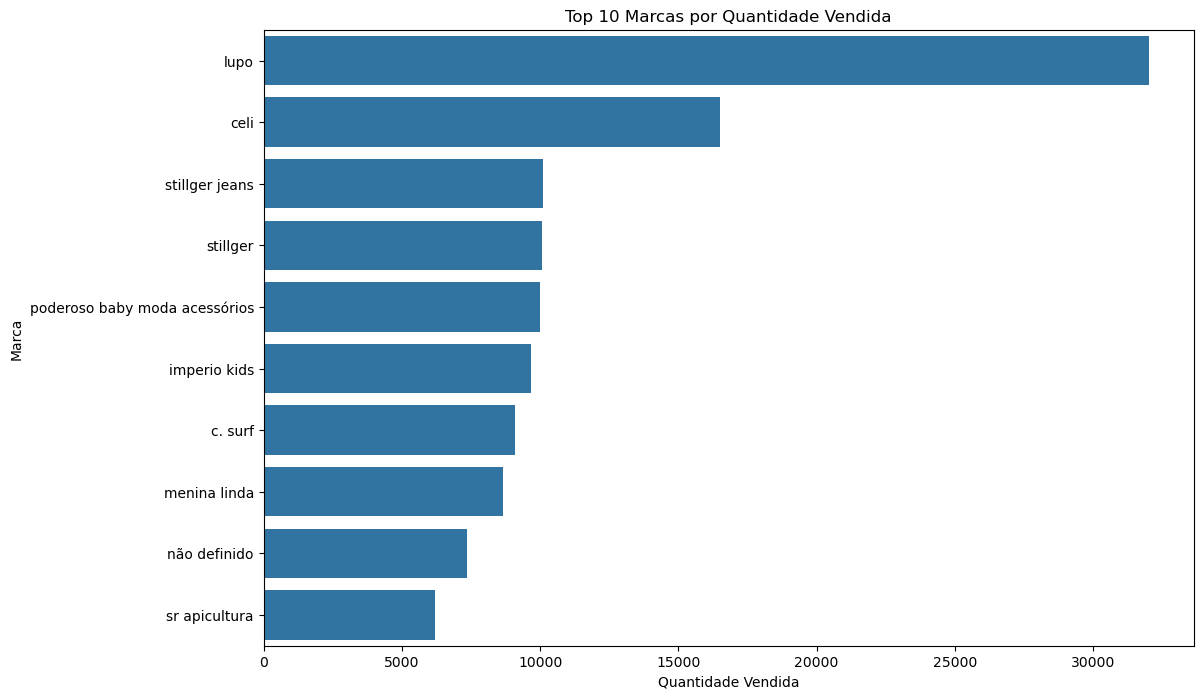

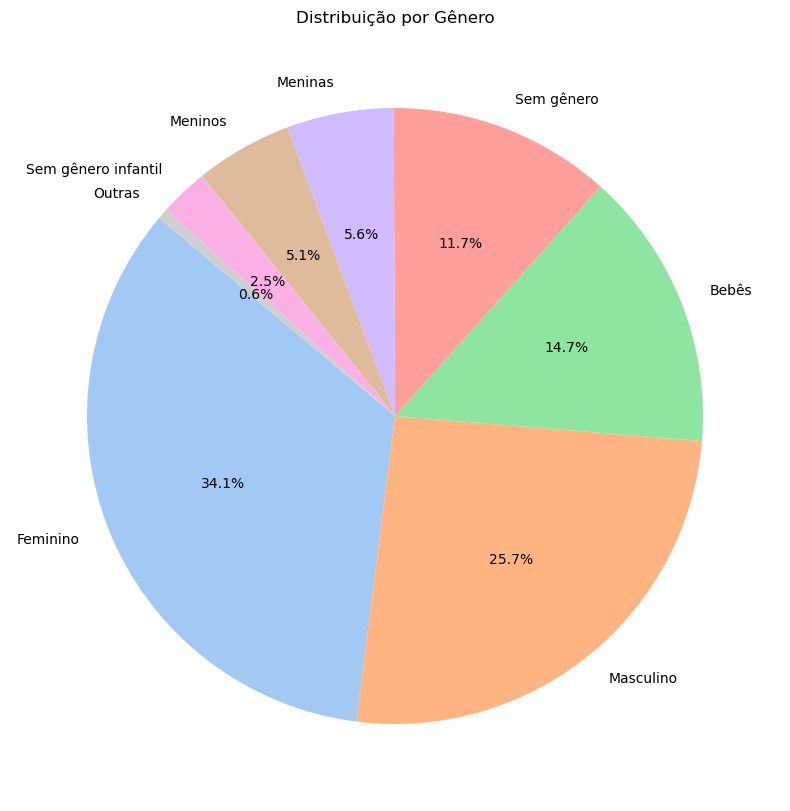

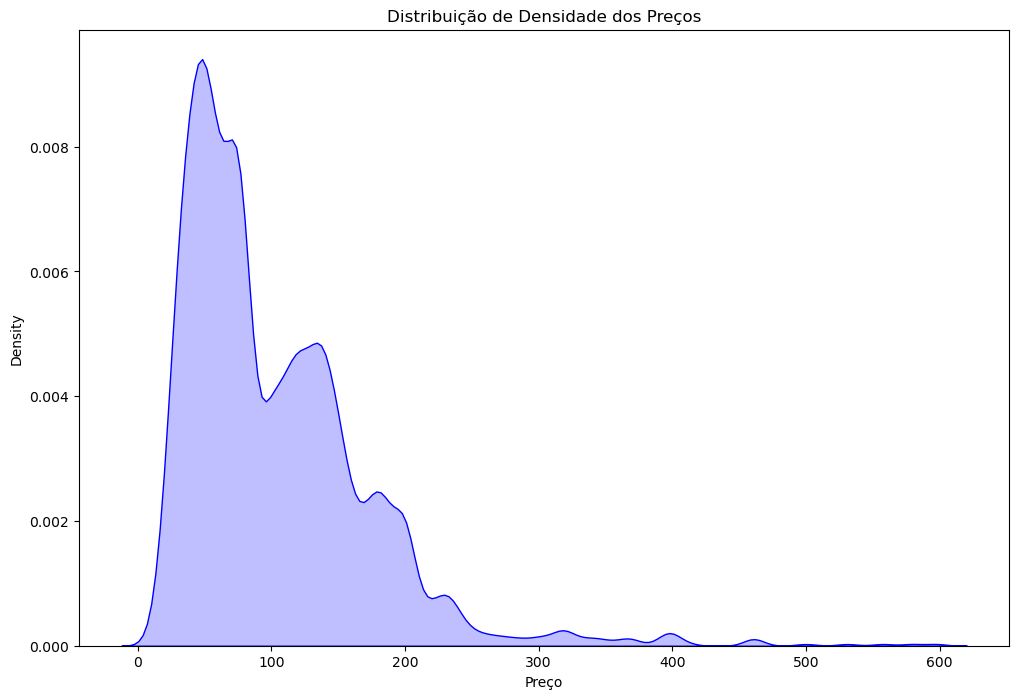

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Carregar os dados
df = pd.read_csv('C:/Users/Cesar/PycharmProjects/coletaDados/ecommerce_preparados.csv')

# Verificar o formato do DataFrame
print(df.head())
print(df.info())

# Converter a coluna 'Qtd_Vendidos' para numérico, forçando erros para NaN
df['Qtd_Vendidos'] = pd.to_numeric(df['Qtd_Vendidos'], errors='coerce')

# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Preço', y='Qtd_Vendidos', data=df)
plt.title('Relação entre Preço e Quantidade Vendida')
plt.xlabel('Preço')
plt.ylabel('Quantidade Vendida')
plt.show()

# Mapa de Calor
# Seleciona apenas as colunas numéricas para calcular a correlação
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))  # Diminuído o tamanho da figura
heatmap = sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor das Correlações entre Variáveis Numéricas')
plt.xticks(rotation=20, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

# Gráfico de Barra Horizontal
# Filtrar as principais marcas por quantidade vendida
top_marcas = df.groupby('Marca')['Qtd_Vendidos'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Qtd_Vendidos', y='Marca', data=top_marcas)
plt.title('Top 10 Marcas por Quantidade Vendida')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Marca')
plt.show()

# Gráfico de Pizza
# Agrupar categorias com frequência baixa em 'Outras'
gênero_counts = df['Gênero'].value_counts()
gênero_counts = gênero_counts[gênero_counts > 50]  # Ajuste o número conforme necessário
outros_count = df['Gênero'].value_counts().sum() - gênero_counts.sum()
gênero_counts = pd.concat([gênero_counts, pd.Series([outros_count], index=['Outras'])])

plt.figure(figsize=(10, 10))
plt.pie(gênero_counts, labels=gênero_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Distribuição por Gênero')
plt.show()

# Gráfico de Densidade
plt.figure(figsize=(12, 8))
sns.kdeplot(df['Preço'], fill=True, color='blue', bw_adjust=0.5)
plt.title('Distribuição de Densidade dos Preços')
plt.xlabel('Preço')
plt.show()
